# Analisis dan Klasifikasi Jenis Cuaca Menggunakan Algoirtma _Multilayer Perceptron (MLP)_



---



## **Business Understanding**


**Konteks Permasalahan :** </br>
Model klasifikasi tipe cuaca berdasarkan parameter meteorologi sangat dibutuhkan sebagai alat bantu penyedia informasi yang akurat, baik untuk badan meteorologi pemerintahan maupun masyarakat untuk membuat kebijakan.

**Tujuan Bisnis :** </br>
Proyek ini bertujuan untuk mengklasifikasikan jenis cuaca menggunakan pendekatan _deep learning_ dengan model _Multilayer Perceptron_ (MLP) berdasarkan fitur-fitur meteorologi seperti temperatur, kelembaban, kecepatan angin, tingkat presipitasi, tutupan awan, tekanan atmosfer, indeks UV, musim serta lokasi pencatatan dan jarak pandang.

**Indikator Keberhasilan :** </br>
Proyek ini diharapkan dapat menghasilkan metrik evaluasi seperti, _Accuracy_, _Precision_, _Recall_ dan _F1-score_ yang baik, sehingga dapat mengklasifikasikan tipe cuaca dengan akurat.



---



## **Data Understanding**


### _Overview Data_

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan :** </br>
_Library_ yang digunakan untuk tahap ini adalah:
* `pandas` untuk memanipulasi data.
* `matplotlib` dan `seaborn` untuk membuat visualisasi.

In [3]:
df_u = pd.read_csv('weather_data_noisy.csv')
df_u.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,NaN,NaN,9.5,82.0,partly cloudy,1010.82,2.0,Winter,NaN,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,NaN,NaN,Spring,10.0,inland,Cloudy
2,30.0,64.0,NaN,16.0,clear,1018.72,5.0,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7.0,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1.0,Winter,NaN,mountain,Rainy


**Penjelasan :** </br>
`df_u` merupakan variabel untuk menyimpan dataset yang diberikan yaitu, `weather_data_noisy.csv` kemudian menampilkan 5 data teratas.

**Penjelasan Kolom**:
*   **Temperature**: Suhu dalam derajat Celsius.
*   **Humidity**: Persentase kelembaban.
*   **Wind Speed**: Kecepatan angin dalam kilometer per jam.
*   **Precipitation (%)**: Persentase curah hujan.
*   **Cloud Cover**: Deskripsi tutupan awan.
*   **Atmospheric Pressure**: Tekanan atmosfer dalam hPa.
*   **UV Index**: Indeks UV, menunjukkan kekuatan radiasi ultraviolet.
*   **Season**: Musim saat data dicatat.
*   **Visibility (km)**: Jarak pandang dalam kilometer.
*   **Location**: Jenis lokasi tempat data dicatat.
*   **Weather Type**: Variabel target untuk klasifikasi, menunjukkan jenis cuaca.

**Sumber dataset**: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

In [4]:
df_u.shape

(13200, 11)

**Penjelasan :** </br>
Dataset ini memiliki ukuran 11 kolom dengan 13.200 baris.

In [5]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11932 non-null  float64
 1   Humidity              11944 non-null  float64
 2   Wind Speed            11866 non-null  float64
 3   Precipitation (%)     11992 non-null  float64
 4   Cloud Cover           11996 non-null  object 
 5   Atmospheric Pressure  11962 non-null  float64
 6   UV Index              11961 non-null  float64
 7   Season                11914 non-null  object 
 8   Visibility (km)       11903 non-null  float64
 9   Location              11962 non-null  object 
 10  Weather Type          11968 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.1+ MB


**Penjelasan :** </br>
Dataset ini memiliki 7 kolom dengan tipe data `float64` dan 4 kolom dengan tipe data `object`

In [6]:
df_u.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,11932.000000,11944.000000,11866.000000,11992.000000,11962.000000,11961.000000,11903.000000
mean,19.190748,68.762224,9.810593,53.704970,1005.905665,3.993061,5.491473
std,17.322859,20.186207,6.886192,31.926319,37.296310,3.852120,3.407255
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,20.000000,994.812500,1.000000,3.000000
50%,21.000000,70.000000,8.500000,58.000000,1007.635000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.780000,7.000000,7.500000
max,108.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


**Penjelasan :** </br>
Fungsi ini digunakan untuk melihat statistik deskriptif dari 7 kolom numerik pada dataset.

In [7]:
for col in df_u.columns:
    print(f"Kolom: {col}")
    print(df_u[col].unique())
    print("-"*40)

Kolom: Temperature
[ nan  39.  30.  38.  27.  32.  -2.   3.  28.  35.  12. -10.  24.  10.
  43.  13.  -7.  33.  26.   4.  40.   2.  15.  29.  11.  36.  42.  21.
  22.  17.  25.  -1.  -5.  41.  31.  16.  34.  49.  19.  14.  23.  -4.
  20.  -3.  18.   1.   0.  46.  -9.  44. -13.  -6.  78.  63.  73.   8.
 -12. -24.  -8.  60.  48.   5.  51. -14.  37.  54.  47.  70.   9. -15.
  59. -16.  80. -19.  52.  45.   6. -18. -11.  74.  76.  55. -20.  91.
  82.  66. -17.  61.   7.  53.  57.  65.  67.  64.  68.  72.  62.  71.
  56. 107. -22.  75.  85.  97.  84. -21.  50.  92.  77. -25.  81.  58.
  98.  94.  90. -23.  88.  99.  69. 100.  89. 102.  86. 108.  87.]
----------------------------------------
Kolom: Humidity
[ nan  96.  64.  83.  74.  55.  97.  85.  45.  43.  59.  87.  50.  27.
  51.  46. 102.  67.  88.  36.  73.  79.  72.  57.  61.  70.  95.  69.
  90. 105.  49.  37.  22.  66.  25.  91.  98.  94.  41.  84.  63.  75.
  52.  89.  47.  54.  81.  62.  31.  68.  35.  78.  56.  93.  44.  38.
  24.

**Penjelasan :** </br>
Fungsi ini digunakan untuk melihat setiap nilai unik dari masing-masing kolom.

### Visualisasi Data

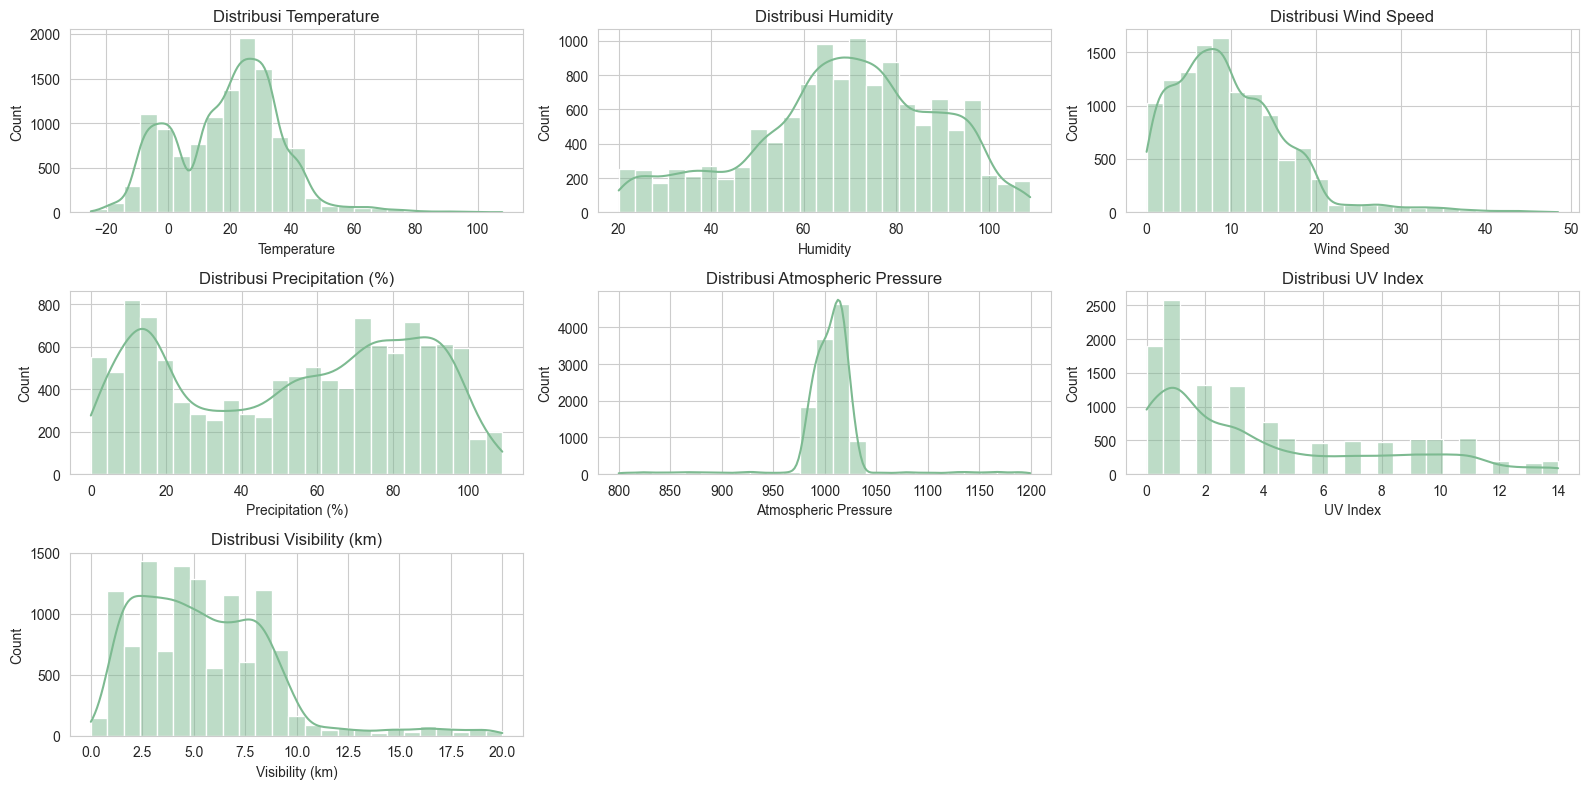

In [8]:
sns.set_style("whitegrid")
sns.set_palette("crest")

num_cols = df_u.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_u, x=col, bins=25, ax=axes[i], kde=True)
    axes[i].set_title("Distribusi "+col, fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Penjelasan :** </br>
Kode ini digunakan untuk melihat distribusi dari 7 kolom numerik menggunakan histogram. Terlihat beberapa kolom mengalami kemencengan (_skewed_) dan memiliki keruncingan yang tinggi.

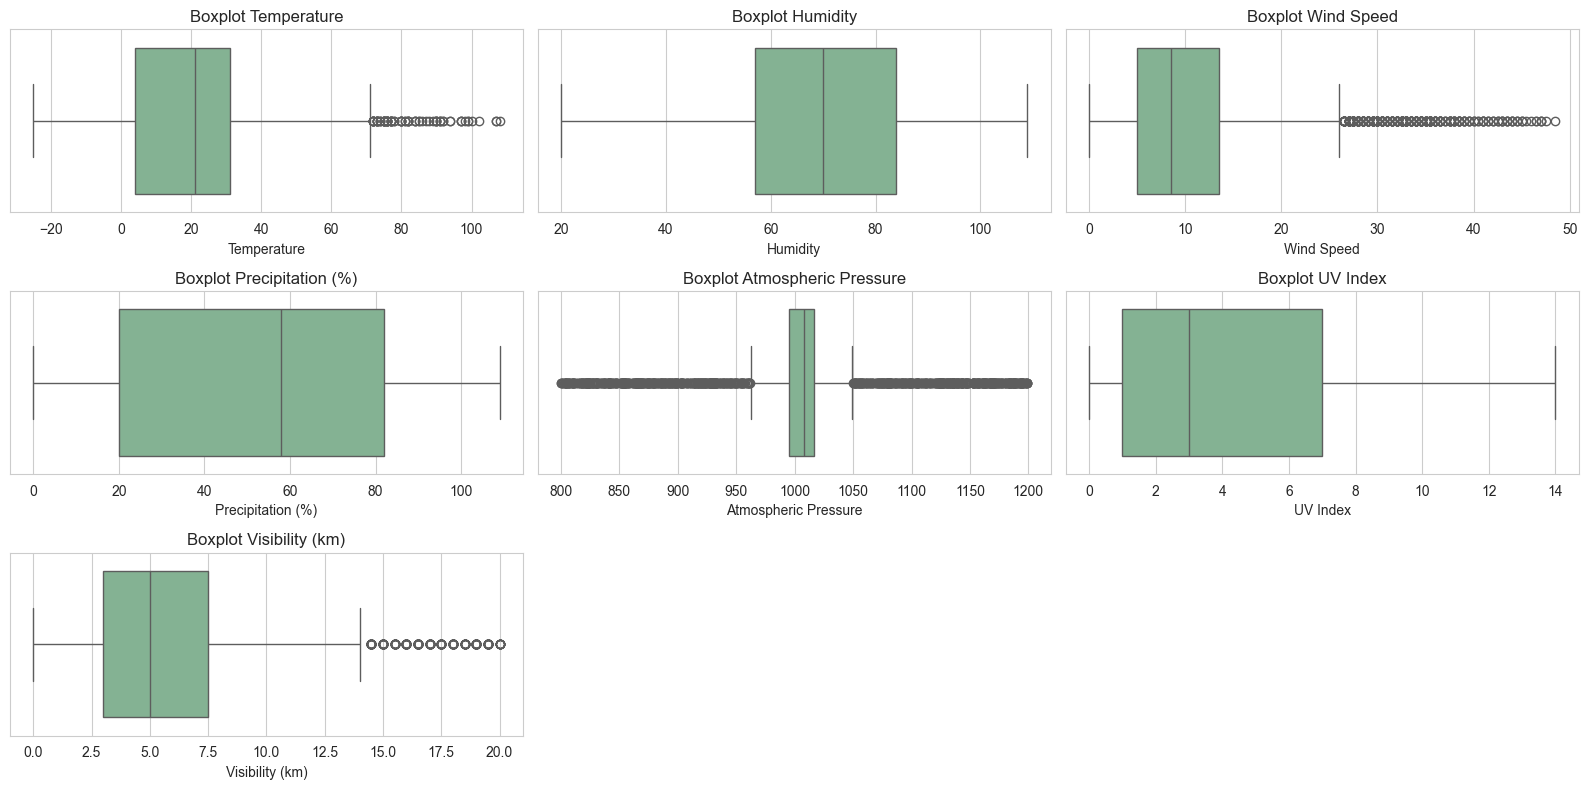

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("crest")

num_cols = df_u.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_u, x=col, ax=axes[i])
    axes[i].set_title("Boxplot "+col, fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Penjelasan :** </br>
Kode ini digunakan untuk melihat distribusi dan kisaran antar kuartil dari 7 kolom numerik menggunakan _boxplot_. Terlihat beberapa kolom seperti temperatur, kecepatan angin, tekanan atmosfer serta visibilitas memiliki _outlier_ (pencilan).

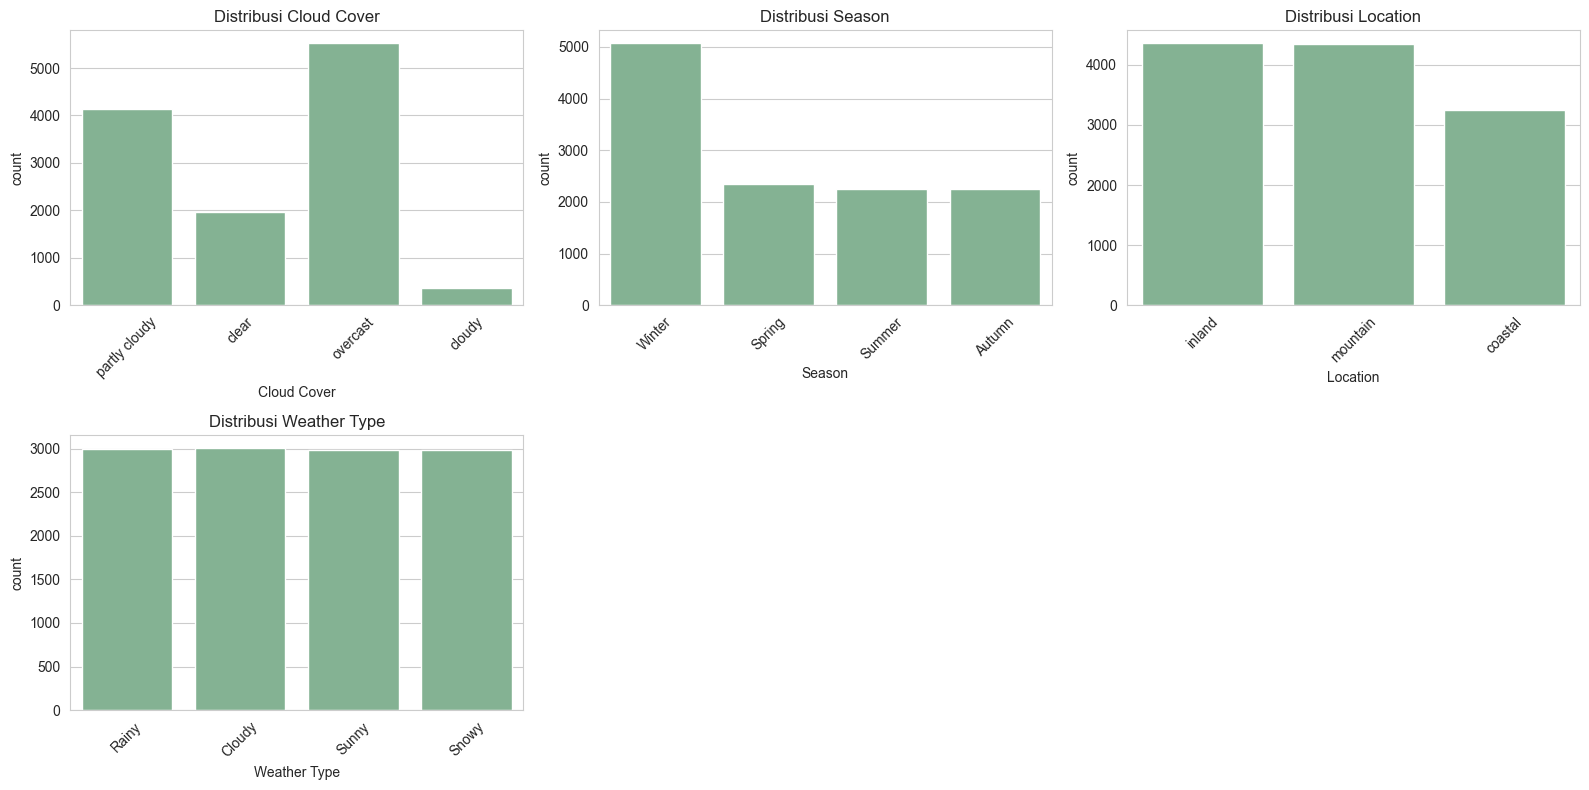

In [10]:
sns.set_style("whitegrid")
sns.set_palette("crest")

cat_cols = df_u.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(nrows=len(cat_cols)//3 + 1, ncols=3, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_u, x=col, ax=axes[i])
    axes[i].set_title("Distribusi "+col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Penjelasan :** </br>
Kode ini digunakan untuk melihat distribusi dari 4 kolom kategorikal menggunakan _barplot_. Terlihat beberapa kolom memiliki ketidakseimbangan jumlah data tiap kategori.

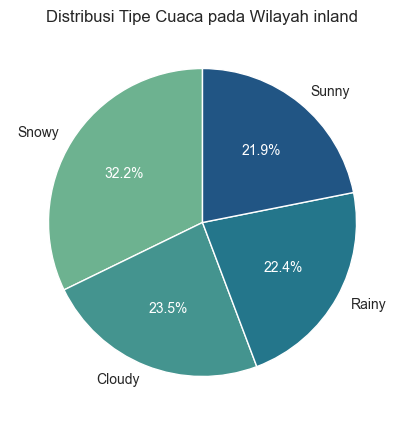

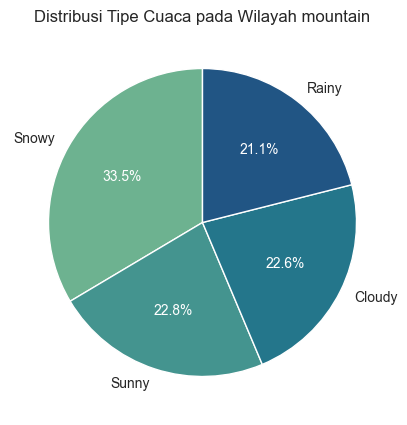

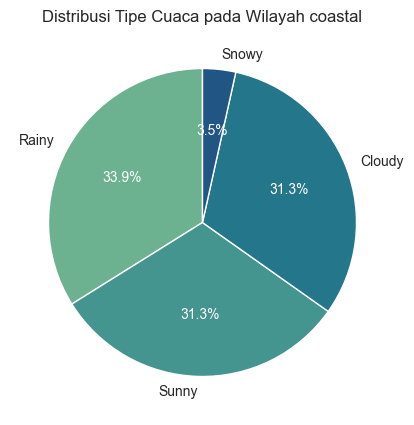

In [11]:
locations = df_u["Location"].dropna().unique()

for loc in locations:
    data_loc = df_u[df_u["Location"] == loc]["Weather Type"].value_counts()
    
    colors = sns.color_palette("crest", n_colors=len(data_loc))
    
    plt.figure(figsize=(5,5))
    
    def func(pct):
        return f"{pct:.1f}%"
    
    wedges, texts, autotexts = plt.pie(
        data_loc,
        labels=data_loc.index,
        autopct=func,
        startangle=90,
        colors=colors
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
    
    plt.title(f"Distribusi Tipe Cuaca pada Wilayah {loc}")
    plt.show()

**Penjelasan :** </br>
Kode ini digunakan untuk melihat komposisi tipe cuaca dari setiap lokasi. Berdasarkan pencatatan, wilayah daratan dan pegunungan didominasi oleh cuaca bersalju lebih dari 30%, sisanya adalah cuaca hujan, berawan dan cerah yang cukup seimbang, hal ini disebabkan oleh pencatatan yang dominan pada musim dingin. sedangkan, pada wilayah pantai, cuaca bersalju jarang terjadi, yaitu hanya sekitar 3,5% ketibang cuaca lainnya di sekitar 30%.

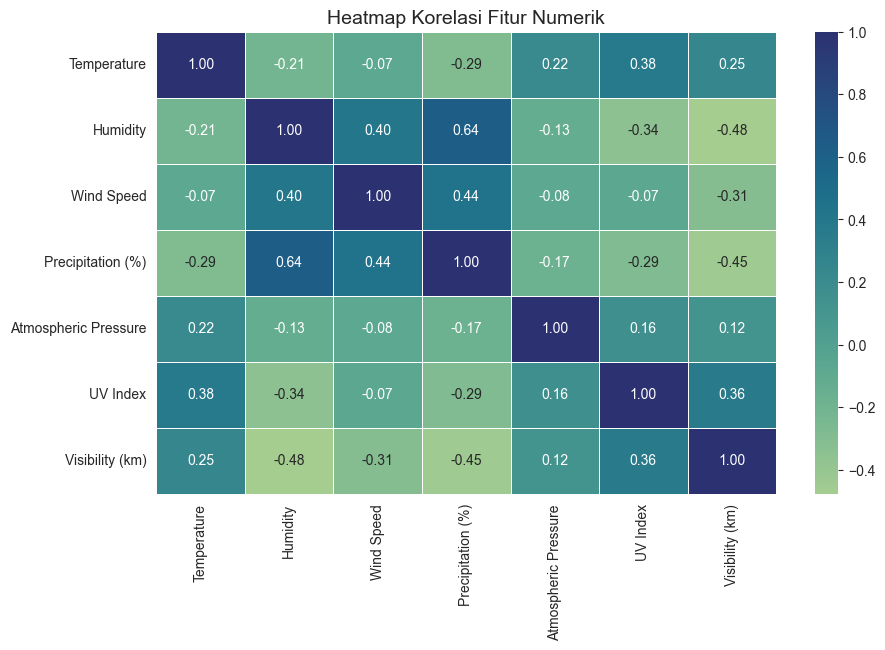

In [12]:
corr = df_u.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik", fontsize=14)
plt.show()

**Penjelasan :** </br>
Kode ini digunakan untuk melihat korelasi antar fitur numerik menggunakan matriks _heatmap_. Terlihat beberapa fitur memiliki koefisien korelasi yang cukup tinggi seperti antara kolom presipitasi dan kelembaban, yaitu 0,64.



---



## **Data Preparation**


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**Penjelasan :** </br>
_Library_ yang digunakan untuk tahap ini adalah:
* `pandas` untuk memanipulasi data.
* `matplotlib` dan `seaborn` untuk membuat visualisasi.
* `numpy` untuk memanipulasi array.
* `missingno` untuk visualisasi data hilang atau kosong.
* `sklearn.impute` untuk imputasi data hilang atau kosong.
* `scipy.stats.mstats` untuk penanganan _outlier_.
* `sklearn.preprocessing` untuk _encoding_ dan skalasi data.
* `sklearn.ensemble` untuk _feature importance_.
* `sklearn.model_selection` untuk _splitting_ data.

In [14]:
df_p = pd.read_csv('weather_data_noisy.csv')
df_p.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,NaN,NaN,9.5,82.0,partly cloudy,1010.82,2.0,Winter,NaN,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,NaN,NaN,Spring,10.0,inland,Cloudy
2,30.0,64.0,NaN,16.0,clear,1018.72,5.0,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7.0,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1.0,Winter,NaN,mountain,Rainy


**Penjelasan :** </br>
`df_p` merupakan variabel khusus tahap _preparation_ untuk menyimpan dataset yang diberikan yaitu, `weather_data_noisy.csv` kemudian menampilkan 5 data teratas.

### _Rename_ Kolom

In [15]:
rename_dict = {
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Wind Speed': 'wind_speed',
    'Precipitation (%)': 'precipitation',
    'Cloud Cover': 'cloud_cover',
    'Atmospheric Pressure': 'atmospheric_pressure',
    'UV Index': 'uv_index',
    'Season': 'season',
    'Visibility (km)': 'visibility',
    'Location': 'location',
    'Weather Type': 'weather_type'
}

In [16]:
df_p.rename(columns=rename_dict, inplace=True)

In [17]:
df_p.head()

,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,uv_index,season,visibility,location,weather_type
0,NaN,NaN,9.5,82.0,partly cloudy,1010.82,2.0,Winter,NaN,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,NaN,NaN,Spring,10.0,inland,Cloudy
2,30.0,64.0,NaN,16.0,clear,1018.72,5.0,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7.0,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1.0,Winter,NaN,mountain,Rainy


**Penjelasan :** </br>
Kode tersebut digunakan untuk me-_rename_ kolom dari dataset supaya penamaan lebih konsisten.

### Cek Nilai _null_ dan Imputasi

In [18]:
df_p['cloud_cover'] = df_p['cloud_cover'].replace("nan", np.nan)
df_p['season'] = df_p['season'].replace("nan", np.nan)
df_p['location'] = df_p['location'].replace("nan", np.nan)
df_p['weather_type'] = df_p['weather_type'].replace("nan", np.nan)

In [19]:
missing_info = df_p.isnull().sum().to_frame(name='missing_count')
missing_info['missing_percent'] = (missing_info['missing_count'] / len(df_p)) * 100
missing_info = missing_info[missing_info['missing_count'] > 0]
missing_info = missing_info.sort_values(by='missing_percent', ascending=False)
print(missing_info)

                      missing_count  missing_percent
wind_speed                     1334        10.106061
visibility                     1297         9.825758
season                         1286         9.742424
temperature                    1268         9.606061
humidity                       1256         9.515152
uv_index                       1239         9.386364
atmospheric_pressure           1238         9.378788
location                       1238         9.378788
weather_type                   1232         9.333333
precipitation                  1208         9.151515
cloud_cover                    1204         9.121212


<Figure size 1600x800 with 0 Axes>

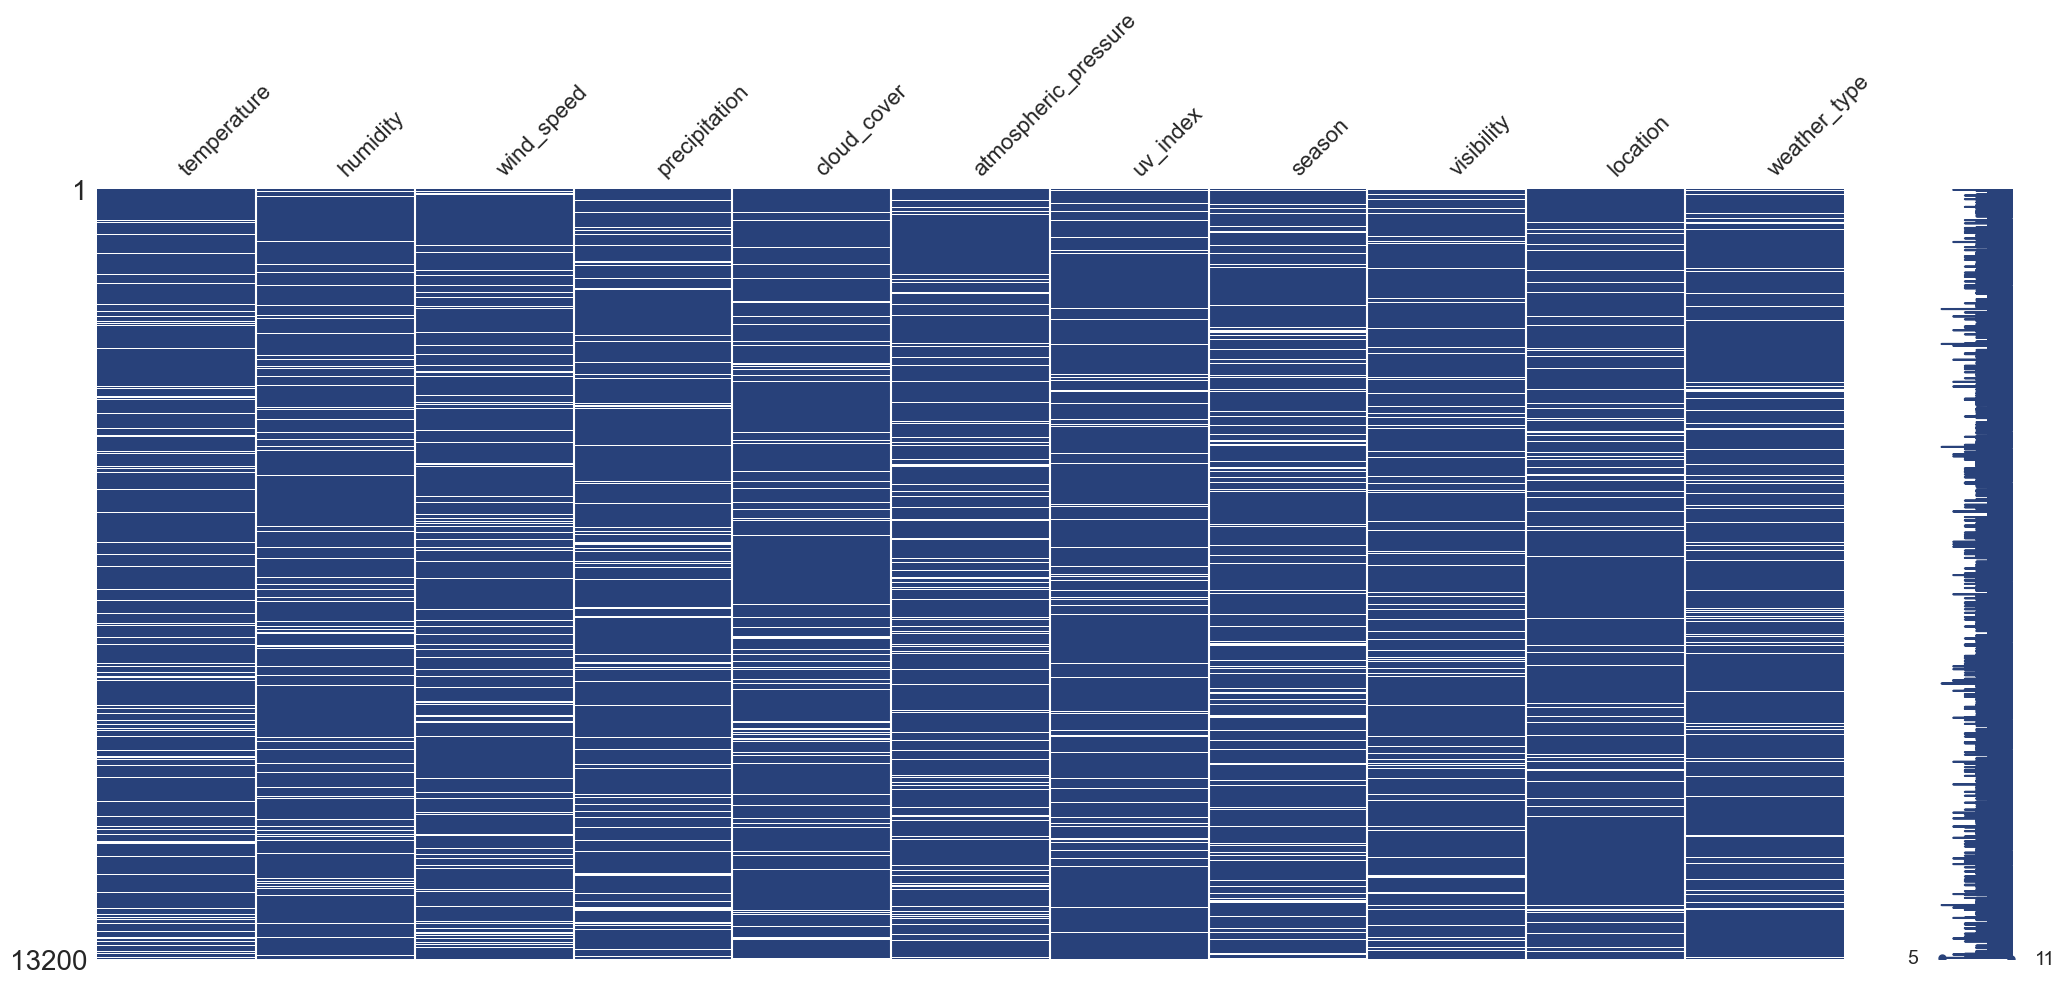

In [20]:
dark_color = sns.color_palette("crest", 10)[-1]

plt.figure(figsize=(16,8))
msno.matrix(df_p, color=dark_color)
plt.show()

**Penjelasan :** </br>
Kode tersebut melihat _null_ dari setiap kolom menggunakan matriks serta komposisi kehilangannya. Terlihat hampir setiap kolom memiliki _null_ sekitar 9%, paling banyak adalah 10,1% pada kolom kecepatan angin.

In [21]:
median_cols = ['wind_speed', 'temperature', 'atmospheric_pressure', 'uv_index', 'visibility']

df_p.loc[df_p['temperature'] > 60, 'temperature'] = 60

imputer = SimpleImputer(strategy='median')
df_p[median_cols] = imputer.fit_transform(df_p[median_cols])

print(df_p[median_cols].isnull().sum())

wind_speed              0
temperature             0
atmospheric_pressure    0
uv_index                0
visibility              0
dtype: int64


**Penjelasan :** </br>
Kode ini bertujuan untuk melakukan imputasi dengan median pada kolom `wind_speed`, `temperature`, `atmospheric_pressure`, `uv_index` dan `visibility`. Hal tersebut dilakukan karena mempertimbangkan outlier yang dimiliki, serta kemencengan distribusi pada kolom tersebut. Sebelumnya, kolom temperatur diberi batasan suhu maksimal 60 derajat Celcius, karena suhu tersebut merupakan suhu yang masih masuk akal pada daerah paling panas di pesisir pantai.

In [22]:
mean_cols = ['humidity', 'precipitation']

df_p.loc[df_p['humidity'] > 100, 'humidity'] = 100
df_p.loc[df_p['precipitation'] > 100, 'precipitation'] = 100

imputer_mean = SimpleImputer(strategy='mean')
df_p[mean_cols] = imputer_mean.fit_transform(df_p[mean_cols])

print(df_p[mean_cols].isnull().sum())

humidity         0
precipitation    0
dtype: int64


**Penjelasan :** </br>
Kode ini bertujuan untuk melakukan imputasi dengan mean pada kolom `humidity` dan `precipitation`. Hal tersebut dilakukan karena mempertimbangkan bentuk distribusi yang hampir normal dan ada yang berbetuk 'M'. Sebelumnya, kolom kelembaban dan tingkat presipitasi diberi batasan, sehingga tidak melebihi 100%.

In [23]:
cat_cols = ['location', 'weather_type']

imputer_cat = SimpleImputer(strategy='most_frequent')

df_p[cat_cols] = imputer_cat.fit_transform(df_p[cat_cols])

print(df_p[cat_cols].isnull().sum())

location        0
weather_type    0
dtype: int64


**Penjelasan :** </br>
Kode ini bertujuan untuk melakukan imputasi dengan mode pada kolom `location` dan `weather_type`. Hal tersebut dilakukan karena mempertimbangkan kolom yang bersifat katogrikal serta distribusi antar kelas yang cukup _balance_.

In [24]:
cat_cols = ['cloud_cover', 'season']

df_cat = df_p.copy()

for col in cat_cols:
    df_cat[col] = df_cat[col].replace("nan", np.nan)

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    not_null = df_cat[col].dropna()
    le.fit(not_null) 
    df_cat[col] = df_cat[col].map(lambda x: le.transform([x])[0] if pd.notnull(x) else np.nan)
    encoders[col] = le

imputer_knn = KNNImputer(n_neighbors=5)
df_cat[cat_cols] = imputer_knn.fit_transform(df_cat[cat_cols])

for col in cat_cols:
    df_cat[col] = df_cat[col].round().astype(int)
    df_cat[col] = encoders[col].inverse_transform(df_cat[col])

df_p[cat_cols] = df_cat[cat_cols]

print(df_p[cat_cols].isnull().sum())

cloud_cover    0
season         0
dtype: int64


**Penjelasan :** </br>
Kode ini bertujuan untuk melakukan imputasi dengan KNN pada kolom `cloud_cover` dan `season`. Hal tersebut dilakukan karena mempertimbangkan kolom yang bersifat katogrikal serta distribusi antar kelas yang tidak _balance_.

<Figure size 1600x800 with 0 Axes>

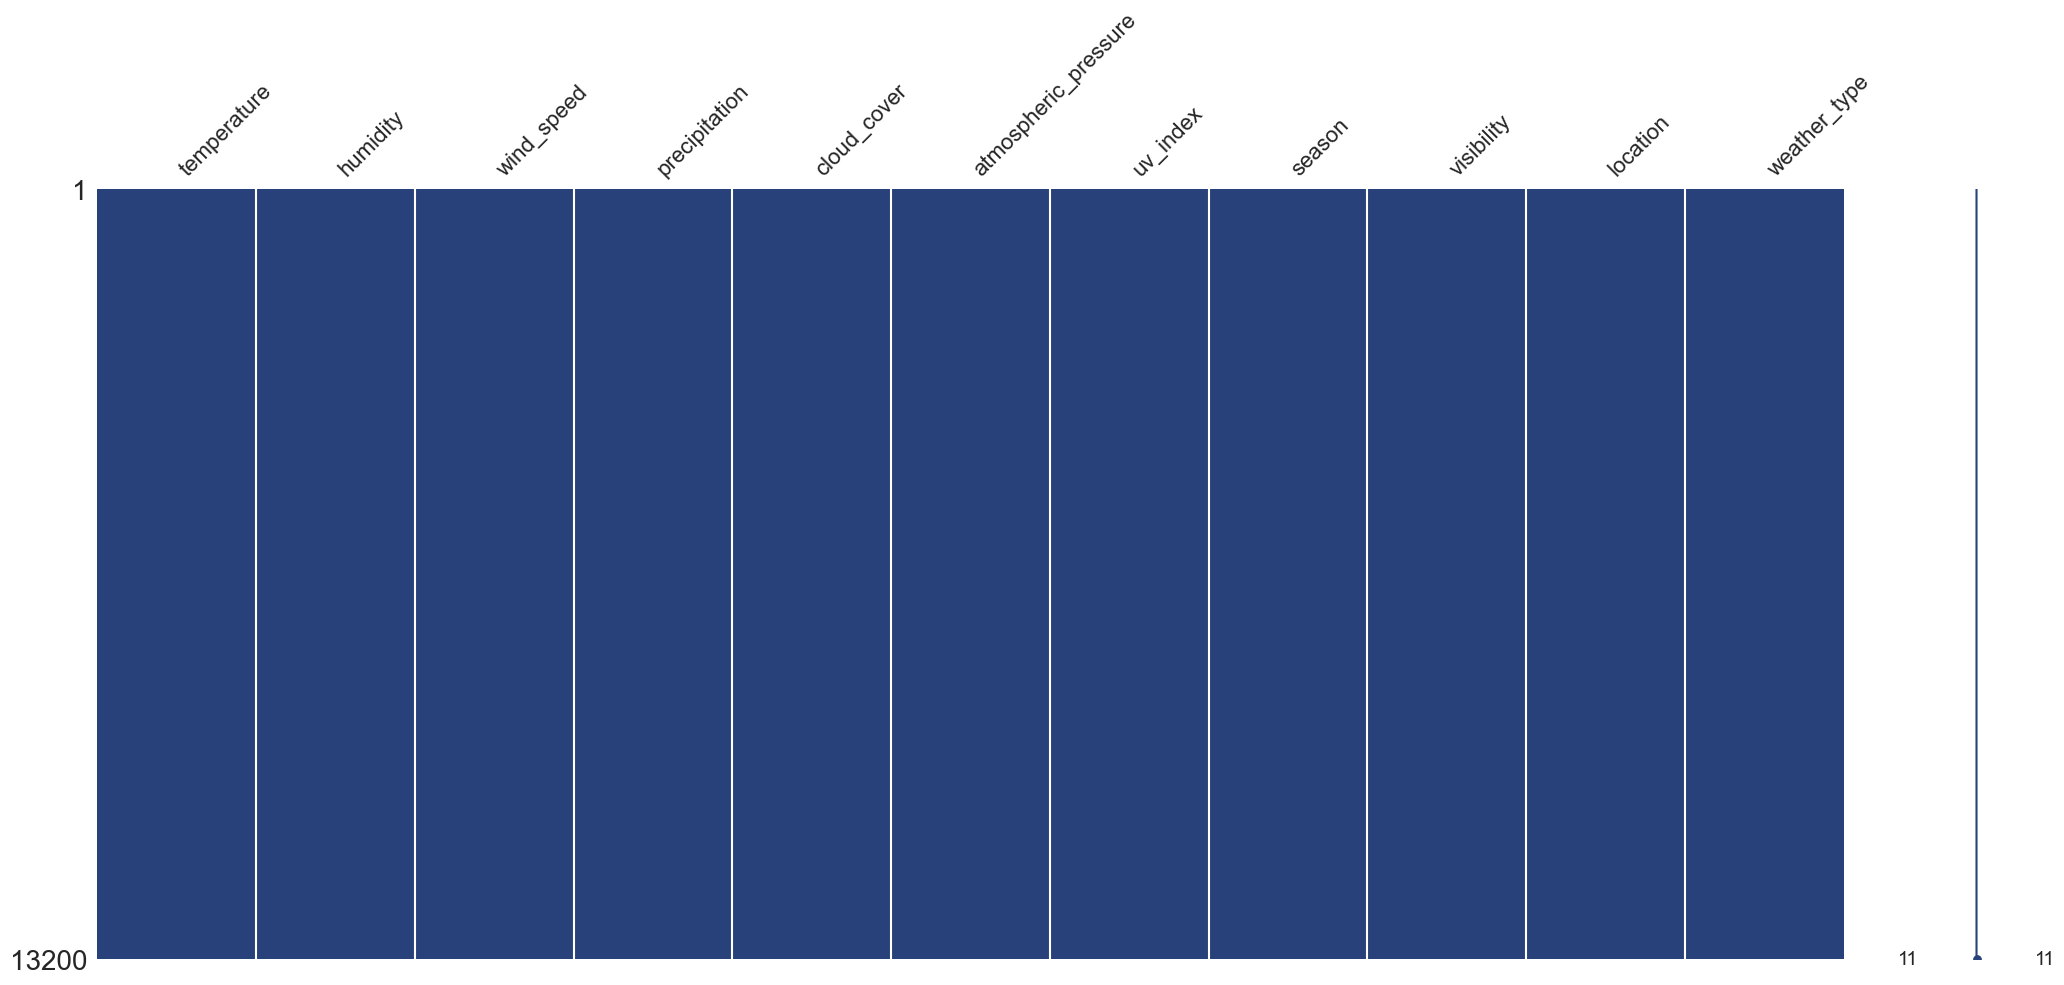

In [25]:
dark_color = sns.color_palette("crest", 10)[-1]

plt.figure(figsize=(16,8))
msno.matrix(df_p, color=dark_color)
plt.show()

**Penjelasan :** </br>
Sekarang data dengan nilai yang hilang atau _null_ sudah terimputasi semuanya.

### Penanganan Outlier

In [26]:
df_p_check_outlier = df_p.select_dtypes(exclude=["object"])

In [27]:
q1 = df_p_check_outlier.quantile(0.25)
q3 = df_p_check_outlier.quantile(0.75)
iqr = q3 - q1
low_bound = q1 - (1.5 * iqr)
up_bound = q3 + (1.5 * iqr)
outliers = ((df_p_check_outlier < low_bound) | (df_p_check_outlier > up_bound))
outliers.sum()

temperature              15
humidity                335
wind_speed              424
precipitation             0
atmospheric_pressure    857
uv_index                187
visibility              366
dtype: int64

**Penjelasan :** </br>
Kode di atas digunakan untuk melihat jumlah _outlier_ pada kolom numerik setelah imputasi. 

In [28]:
columns_to_winsorize = [
    'temperature',
    'humidity',
    'atmospheric_pressure',
]
for col in columns_to_winsorize:
 if pd.api.types.is_numeric_dtype(df_p[col]):
     df_p[col] = winsorize(df_p[col], limits=[0.02, 0.02])

In [29]:
columns_to_winsorize = [
    'wind_speed',
    'uv_index',
    'visibility'
]
for col in columns_to_winsorize:
 if pd.api.types.is_numeric_dtype(df_p[col]):
     df_p[col] = winsorize(df_p[col], limits=[0.00, 0.02])

**Penjelasan :** </br>
Kode di atas digunakan untuk menangani outlier dengan teknik _winsorizing_ supaya tidak kehilangan banyak data. Parameter `limits` disesuaikan dengan bentuk distribusi serta jangkauan data. 

### _Encoding_ Data

In [30]:
feature_cat_cols = ['cloud_cover', 'season', 'location']
target_col = 'weather_type'

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_p[feature_cat_cols])

encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(feature_cat_cols),
    index=df_p.index
)

num_cols = ['temperature', 'humidity', 'wind_speed', 'visibility', 'atmospheric_pressure', 'uv_index', 'precipitation']
df_features = pd.concat([df_p[num_cols], encoded_df], axis=1)

le = LabelEncoder()
y = le.fit_transform(df_p[target_col])

print(df_features.head())

   temperature   humidity  wind_speed  visibility  atmospheric_pressure  \
0         21.0  68.598711         9.5         5.0              1010.820   
1         39.0  96.000000         8.5        10.0              1007.635   
2         30.0  64.000000         8.5         5.5              1018.720   
3         38.0  83.000000         1.5         1.0              1026.250   
4         27.0  74.000000        17.0         5.0               990.670   

   uv_index  precipitation  cloud_cover_clear  cloud_cover_cloudy  \
0       2.0           82.0                0.0                 0.0   
1       3.0           71.0                0.0                 0.0   
2       5.0           16.0                1.0                 0.0   
3       7.0           82.0                1.0                 0.0   
4       1.0           66.0                0.0                 0.0   

   cloud_cover_overcast  cloud_cover_partly cloudy  season_Autumn  \
0                   0.0                        1.0            0.0

In [31]:
print(y[:10])

[1 0 3 3 1 0 2 2 2 3]


In [32]:
df_target = pd.DataFrame(y, columns=[target_col], index=df_p.index)

df_encoded_full = pd.concat([df_features, df_target], axis=1)

df_encoded_full.head()

,temperature,humidity,wind_speed,visibility,atmospheric_pressure,uv_index,precipitation,cloud_cover_clear,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_Autumn,season_Spring,season_Summer,season_Winter,location_coastal,location_inland,location_mountain,weather_type
0,21.0,68.598711,9.5,5.0,1010.820,2.0,82.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,39.0,96.000000,8.5,10.0,1007.635,3.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,30.0,64.000000,8.5,5.5,1018.720,5.0,16.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3,38.0,83.000000,1.5,1.0,1026.250,7.0,82.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
4,27.0,74.000000,17.0,5.0,990.670,1.0,66.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


**Penjelasan :** </br>
Kode di atas digunakan untuk meng-_encode_ kolom kategorikal menggunakan `OneHotEncoder` karena data bersifat nominal, kecuali untuk kolom weather_type--menggunakan `LabelEncoder`

### _Feature Importance_

In [33]:
X = df_encoded_full.drop("weather_type", axis=1)
y = df_encoded_full["weather_type"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)

                      Feature  Importance
0                 temperature    0.175863
4        atmospheric_pressure    0.139749
3                  visibility    0.130012
6               precipitation    0.127515
5                    uv_index    0.106410
1                    humidity    0.078851
7           cloud_cover_clear    0.076259
2                  wind_speed    0.060317
14              season_Winter    0.026765
9        cloud_cover_overcast    0.014803
15           location_coastal    0.013639
10  cloud_cover_partly cloudy    0.008432
12              season_Spring    0.007896
11              season_Autumn    0.007858
16            location_inland    0.007085
17          location_mountain    0.006897
13              season_Summer    0.006010
8          cloud_cover_cloudy    0.005639


**Penjelasan :** </br>
Kode di atas digunakan untuk menilai seberapa penting sebuah fitur terhadap kolom target, yaitu `weather_type` menggunakan `RandomForrestClassifier`

### _Splitting Data_

In [34]:
X = df_encoded_full.drop(columns=['weather_type'])
y = df_encoded_full['weather_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Penjelasan :** </br>
Kode di atas digunakan untuk memisahkan `weather_type` sebagai target. Kemudian menetapkan perbandingan data latih dan data uji sebesar 80:20.

### Skalasi Data

In [35]:
num_cols = ['temperature', 'humidity', 'wind_speed', 'visibility', 'atmospheric_pressure', 'uv_index', 'precipitation']
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**Penjelasan :** </br>
Kode di atas digunakan untuk menskalasi 7 fitur numerik menggunakan `MinMaxScaler` sebab, distribusi data yang tidak sepenuhnya normal.



---



## **Modeling**


In [36]:
from sklearn.neural_network import MLPClassifier

**Penjelasan :** </br>
_Library_ yang digunakan untuk tahap ini adalah:
* `sklearn.neural_network` digunakan untuk mengimpor model berbasis _deep learning_ yaitu `MLPCassifier`.

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', max_iter=500, random_state=42)

In [38]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

**Penjelasan :** </br>
Kode di atas digunakan untuk melakukan _modeling_ menggunakan `MLPClassifier`, dengan parameter sebagai berikut:
* 2 _hidden layer_ (64 & 32 neuron).
* Setiap _neuron_ menggunakan aktivasi ReLU.
* Training dilakukan maksimal 500 iterasi.
* Supaya hasil konsisten, digunakan random_state senilai 42.



---



## **Evaluation**


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

**Penjelasan :** </br>
_Library_ yang digunakan untuk tahap ini adalah:
* `matplotlib` dan `seaborn` untuk membuat visualisasi. 
* `sklearn.metrics` untuk menghasilkan metrik evaluasi.

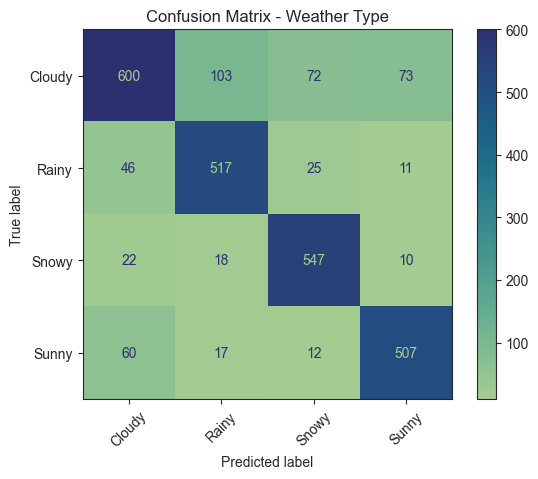

Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.82      0.71      0.76       848
       Rainy       0.79      0.86      0.82       599
       Snowy       0.83      0.92      0.87       597
       Sunny       0.84      0.85      0.85       596

    accuracy                           0.82      2640
   macro avg       0.82      0.83      0.83      2640
weighted avg       0.82      0.82      0.82      2640



In [40]:
sns.set_style("ticks")
y_pred = mlp.predict(X_test)

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="crest", xticks_rotation=45)
plt.title("Confusion Matrix - Weather Type")
plt.show()

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

**Penjelasan :** </br>
Kode di atas digunakan untuk menghasilkan metrik evaluasi serta penggambarannya dengan _confusion matrix_. </br>
Keterangan :</br>
* _accuracy_ : Persentase prediksi yang benar dibandingkan dengan seluruh data uji.
* _precision_ : Tingkat ketepatan prediksi positif, yaitu seberapa banyak prediksi positif yang benar-benar positif.
* _recall_ : Tingkat keberhasilan model dalam menemukan seluruh data positif.
* _F1-Score_ : Rata-rata harmonis dari _precision_ dan _recall_.
* _Support_ : Jumlah data aktual dari setiap kelas dalam dataset uji.



---



## **Deployment**

In [41]:
import joblib

**Penjelasan :** </br>
_Library_ yang digunakan untuk tahap ini adalah:
* `joblib` untuk menyimpan model yang telah dilatih. 

In [42]:
joblib.dump(mlp, 'model_mlp.pkl')
print("Model berhasil disimpan sebagai 'model_mlp.pkl'")

Model berhasil disimpan sebagai 'model_mlp.pkl'


In [43]:
joblib.dump(le, 'label_encoder.pkl')
print("Label encoder berhasil disimpan sebagai 'label_encoder.pkl'")

Label encoder berhasil disimpan sebagai 'label_encoder.pkl'


In [44]:
joblib.dump(encoder, 'onehot_encoder.pkl')
print("OneHotEncoder berhasil disimpan sebagai 'onehot_encoder.pkl'")

OneHotEncoder berhasil disimpan sebagai 'onehot_encoder.pkl'


In [45]:
joblib.dump(scaler, 'minmax_scaler.pkl')
print("MinMaxScaler berhasil disimpan sebagai 'minmax_scaler.pkl'")

MinMaxScaler berhasil disimpan sebagai 'minmax_scaler.pkl'


**Penjelasan :** </br>
Kode di atas bertujuan untuk menyimpan setiap objek dari hasil pemodelan, _encoding_ dan skalasi.



---



## **Kesimpulan**


| Weather Type | Precision | Recall | F1-Score |
|--------------|-----------|--------|----------|
| Cloudy       | 82%       | 71%    | 76%      |
| Rainy        | 79%       | 86%    | 82%      |
| Snowy        | 83%       | 92%    | 87%      |
| Sunny        | 84%       | 85%    | 85%      |
| **Accuracy** |           |        | **82%**  |
| **Macro Avg**| 82%       | 83%    | 83%      |
| **Weighted Avg** | 82%   | 82%    | 82%      |


Berdasarkan hasil _classification report_ di atas, model _Multilayer Perceptron_ (MLP) mampu melakukan klasifikasi cuaca dengan cukup baik pada empat kelas (`Cloudy`, `Rainy`, `Snowy`, dan `Sunny`). Secara keseluruhan, model mencapai **akurasi sebesar 82%**, dengan nilai **_macro average precision_ 0.82, _recall_ 0.83, dan _f1-score_ 0.83**, yang menunjukkan performa seimbang di seluruh kelas.

Dilihat per kelas, performa terbaik dicapai pada kelas `Snowy` dengan **_f1-score_ 0.87** berkat **_recall_ 0.92** dan **_precision_ 0.83**. Kelas `Rainy` dan `Sunny` juga menunjukkan hasil baik dengan **_f1-score_ 0.82 dan 0.85**. Sementara itu, kelas `Cloudy` sedikit lebih rendah dengan **_f1-score_ 0.76**, terutama karena **_recall_ 0.71**, menandakan bahwa model masih cukup sering salah dalam mengenali cuaca berawan.

Secara umum, hasil ini menunjukkan bahwa model MLP cukup andal dalam mengklasifikasikan kondisi cuaca, meskipun terdapat ruang perbaikan khususnya dalam membedakan kelas `Cloudy` dengan kelas lain.
